In [ ]:
# Add table of contents

In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataframe
df = pd.read_pickle('../data/df_clean_2018.pkl')

df.head(3)

,case_id,target,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,...,address,street,supervisor_district,neighborhood,police_district,latitude,longitude,point,source,has_media
810969,9995194,1,2018-12-31 10:42:22,2018-12-31 00:00:00,2018-12-31 00:00:00,Closed,Case Resolved - duplicate of 21375555 -,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,...,"31 HANGAH ST, SAN FRANCISCO, CA, 94108",HANGAH ST,3.0,Chinatown,CENTRAL,37.793526,-122.407562,"(37.7935257, -122.40756226)",Integrated Agency,0
811474,9993791,1,2018-12-30 22:40:00,2018-12-30 23:13:06,2018-12-30 23:13:06,Closed,Case Resolved - Officer responded to request u...,Parking Enforcement Dispatch Queue,Parking Enforcement,Parking_on_Sidewalk,...,"140 PRECITA AVE, SAN FRANCISCO, CA, 94110",PRECITA AVE,9.0,Bernal Heights,INGLESIDE,37.747047,-122.417297,"(37.747047, -122.417297)",Mobile/Open311,1
811481,9993771,1,2018-12-30 22:18:00,2018-12-30 22:19:29,2018-12-30 22:19:29,Closed,Case is Invalid - Contact name and phone numbe...,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,...,"754 MOULTRIE ST, SAN FRANCISCO, CA, 94110",MOULTRIE ST,9.0,Bernal Heights,INGLESIDE,37.735334,-122.416215,"(37.73533399, -122.4162146)",Phone,0


# Cyclical Features
http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

In [10]:
# Year
df['opened_year'] = df['opened'].dt.year.astype('category')

# Month
month = df['opened'].dt.month
df['opened_month_sin'] = np.sin(month*(2.*np.pi/12))
df['opened_month_cos'] = np.cos(month*(2.*np.pi/12))

# Week
week = df['opened'].dt.week
df['opened_week_sin'] = np.sin(week*(2.*np.pi/52))
df['opened_week_cos'] = np.cos(week*(2.*np.pi/52))

# Day of week
day = df['opened'].dt.dayofweek
df['opened_day_sin'] = np.sin(day*(2.*np.pi/7))
df['opened_day_cos'] = np.cos(day*(2.*np.pi/7))

# Hour
hour = df['opened'].dt.hour
df['opened_hour_sin'] = np.sin(hour*(2.*np.pi/24))
df['opened_hour_cos'] = np.cos(hour*(2.*np.pi/24))

In [11]:
df.head(3)

,case_id,target,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,...,has_media,opened_year,opened_month_sin,opened_month_cos,opened_week_sin,opened_week_cos,opened_day_sin,opened_day_cos,opened_hour_sin,opened_hour_cos
810969,9995194,1,2018-12-31 10:42:22,2018-12-31 00:00:00,2018-12-31 00:00:00,Closed,Case Resolved - duplicate of 21375555 -,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,...,0,2018,-2.449294e-16,1.0,1.205367e-01,0.992709,0.000000,1.00000,0.5,-0.866025
811474,9993791,1,2018-12-30 22:40:00,2018-12-30 23:13:06,2018-12-30 23:13:06,Closed,Case Resolved - Officer responded to request u...,Parking Enforcement Dispatch Queue,Parking Enforcement,Parking_on_Sidewalk,...,1,2018,-2.449294e-16,1.0,-2.449294e-16,1.000000,-0.781831,0.62349,-0.5,0.866025
811481,9993771,1,2018-12-30 22:18:00,2018-12-30 22:19:29,2018-12-30 22:19:29,Closed,Case is Invalid - Contact name and phone numbe...,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,...,0,2018,-2.449294e-16,1.0,-2.449294e-16,1.000000,-0.781831,0.62349,-0.5,0.866025


# Latitude and Longitude

In [12]:
# Rounding the lat/long
df['latitude'] = round(df['latitude'], 4)
df['longitude'] = round(df['longitude'], 4)
df.shape

(530810, 30)

## Resolution Time

In [13]:
# Diff in minutes
df['resolution_time'] = df['closed'] - df['opened']
df['resolution_time'] = (df['resolution_time']/np.timedelta64(1,'m'))
# Remove rows with negative minutes & requests over 7 days
df = df.loc[(df['resolution_time'] > 0)] # * (df['resolution_time'] < 10080)
df.shape

(530759, 31)

In [16]:
df.to_pickle('../data/df_pre_model_2018.pkl')

# Appendix

(array([5.10133e+05, 8.92600e+03, 2.98000e+03, 2.12000e+03, 2.67800e+03,
        1.71700e+03, 1.07800e+03, 5.04000e+02, 3.89000e+02, 2.34000e+02]),
 array([1.66666667e-02, 5.18661767e+04, 1.03732337e+05, 1.55598497e+05,
        2.07464657e+05, 2.59330817e+05, 3.11196977e+05, 3.63063137e+05,
        4.14929297e+05, 4.66795457e+05, 5.18661617e+05]),
 <a list of 10 Patch objects>)

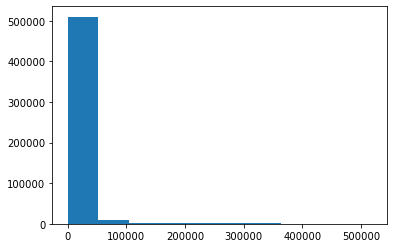

In [14]:
# Distribution of Resolution Time
plt.hist(df['resolution_time'])

In [9]:
# Top categories by frequency of wasteful requests
df.loc[df['target']==1, 'category'].value_counts()[:10]

Abandoned Vehicle                 25309
Encampments                       22140
Street and Sidewalk Cleaning      18950
Parking Enforcement               14824
Graffiti                          10237
General Request - PUBLIC WORKS     2529
Homeless Concerns                  2415
Tree Maintenance                   2413
Rec and Park Requests              1975
Sewer Issues                       1586
Name: category, dtype: int64